# Random forests

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
print(players_all['winner'].value_counts(normalize=True))

winner
True     0.501909
False    0.498091
Name: proportion, dtype: float64


In [4]:

players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])


# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])


In [5]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


In [6]:
teams_all.head()

,movement_avg_speed_1,movement_total_distance_1,movement_time_supersonic_speed_1,movement_time_boost_speed_1,movement_time_slow_speed_1,movement_time_ground_1,movement_time_low_air_1,movement_time_high_air_1,movement_time_powerslide_1,movement_count_powerslide_1,...,avg_positioning_time_most_back,max_movement_percent_high_air,min_movement_percent_high_air,var_movement_percent_high_air,avg_movement_percent_high_air,max_movement_percent_supersonic_speed,min_movement_percent_supersonic_speed,var_movement_percent_supersonic_speed,avg_movement_percent_supersonic_speed,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,117.70,5.75,2.36,1.92,4.07,11.20,9.47,0.52,10.44,False
1,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,119.37,6.33,0.66,5.57,3.17,13.26,6.27,8.49,10.18,True
2,1430.0,561540.0,50.30,150.27,216.30,217.17,177.03,22.67,11.74,103.0,...,132.60,5.44,3.86,0.45,4.78,14.12,7.32,8.11,11.17,True
3,1559.0,609572.0,66.07,166.44,181.22,237.20,165.62,10.91,11.98,120.0,...,133.23,5.50,2.64,1.37,4.14,15.97,7.48,12.22,11.40,False
4,1486.0,486636.0,27.96,145.74,177.11,218.76,123.81,8.24,7.00,62.0,...,114.97,6.45,1.25,5.01,3.35,11.70,7.29,3.76,8.99,False


### X,y division

In [7]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]
X_small_file = small_file.iloc[:, 0:44]

In [8]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]
y_small_file = small_file.iloc[:, 44]

In [9]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [10]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Train-test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_teams_pro, y_teams_pro, random_state=20, test_size=0.2)

# Model 1 -----------------------------------------------

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# random forests model
rf = RandomForestClassifier(n_estimators=500,
                             min_samples_split=10)

In [16]:
#40 sec voor individueel / 55 sec voor teams / nu 7 min met extra HP

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=500)

## Scores

In [18]:
y_pred = rf.predict(X_test)

In [19]:
rf.score(X_test, y_test)

0.7900638750887155

### F1 enzoo metrics

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.79      0.79      3537
        True       0.79      0.79      0.79      3508

    accuracy                           0.79      7045
   macro avg       0.79      0.79      0.79      7045
weighted avg       0.79      0.79      0.79      7045



In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [23]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7900638750887155
recall 0.7913340935005702
precision 0.7879648027249503
f1 0.7896458540748116


## Conf matrix

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
print(confusion_matrix(y_test, y_pred))

[[2790  747]
 [ 732 2776]]


[[2790  747]
 [ 732 2776]]
0.7900638750887155


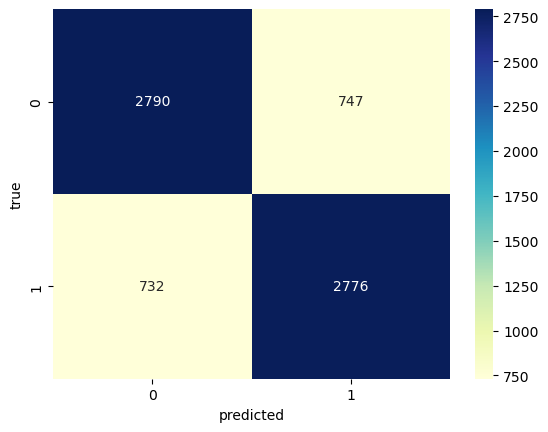

In [26]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()

## ROC curve

[0.95252063 0.05826331 0.83932131 0.04422673 0.87409456 0.51380751
 0.90599461 0.46253224 0.61850992 0.84172579 0.28977891 0.952807
 0.99719351 0.83605532 0.01301538 0.67406194 0.76007788 0.78016692
 0.54545898 0.09195471 0.24632039 0.4216303  0.80748458 0.71241045
 0.94090326 0.28059631 0.40238064 0.9767068  0.56443271 0.72129981
 0.16381653 0.36741682 0.76700772 0.46433301 0.07322036 0.08946104
 0.63627582 0.73493775 0.61220925 0.91818153 0.71017404 0.98850361
 0.38752642 0.20575271 0.07388453 0.66651711 0.02881551 0.95263498
 0.85013736 0.97460945 0.10767596 0.25983017 0.4585565  0.266847
 0.09142435 0.85346753 0.06031975 0.06704661 0.75691702 0.07879759
 0.93302422 0.96587177 0.45661093 0.45277219 0.96428173 0.56027557
 0.18453614 0.59568914 0.69892797 0.47361837 0.32710917 0.6122008
 0.46880228 0.3902263  0.86275485 0.40869601 0.95940226 0.43151624
 0.48202361 0.15646994 0.48375559 0.73082794 0.56547442 0.4043384
 0.71578275 0.57025937 0.19784345 0.80930001 0.07931189 0.30748221
 

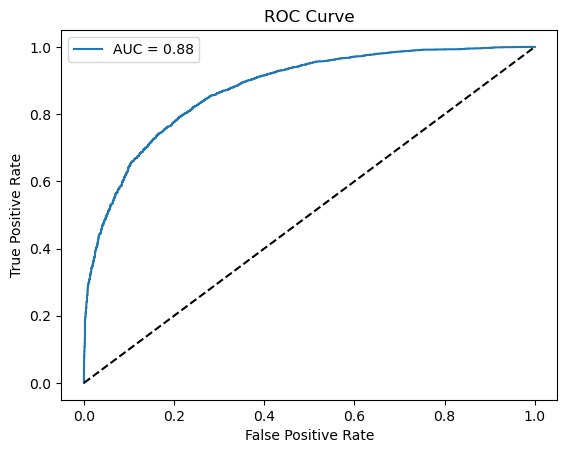

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Imporant features

In [28]:
features = pd.DataFrame(rf.feature_importances_, index = X_train.columns)

In [29]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_behind_ball,0.060720
avg_positioning_percent_infront_ball,0.057959
avg_positioning_time_front_of_ball,0.041746
min_positioning_percent_infront_ball,0.037792
max_positioning_percent_behind_ball,0.032356
...,...
min_speed,0.002192
movement_avg_speed_2,0.002176
movement_avg_powerslide_duration_1,0.001481
movement_avg_powerslide_duration_2,0.001430


In [30]:
correlations = pd.DataFrame(X_train.corrwith(y_train))
correlations.sort_values(0, ascending=False)

,0
avg_positioning_percent_behind_ball,0.602630
max_positioning_percent_behind_ball,0.531165
min_positioning_percent_behind_ball,0.491342
positioning_percent_behind_ball_2,0.430752
positioning_percent_behind_ball_3,0.423508
...,...
positioning_percent_infront_ball_3,-0.423508
positioning_percent_infront_ball_2,-0.430752
max_positioning_percent_infront_ball,-0.491342
min_positioning_percent_infront_ball,-0.531165


## statistics

In [31]:
# average for winners and average for losers
X_train['avg_positioning_percent_behind_ball'].groupby(y_train).mean()

winner
False    69.980104
True     74.185603
Name: avg_positioning_percent_behind_ball, dtype: float64

In [32]:
# average for winners and average for losers
X_train['max_positioning_percent_behind_ball'].groupby(y_train).mean()

winner
False    73.643310
True     77.813975
Name: max_positioning_percent_behind_ball, dtype: float64

In [33]:
# average for winners and average for losers
X_train['avg_positioning_percent_infront_ball'].groupby(y_train).mean()

winner
False    30.019892
True     25.814397
Name: avg_positioning_percent_infront_ball, dtype: float64

In [34]:
# average for winners and average for losers
X_train['min_positioning_percent_infront_ball'].groupby(y_train).mean()

winner
False    26.356690
True     22.186025
Name: min_positioning_percent_infront_ball, dtype: float64

# Model 2 -------------------------------

## Model

In [35]:
rf2 = RandomForestClassifier(n_estimators=500,
                             criterion='entropy',
                             min_samples_split=10,
                             max_depth = 14,
                             random_state = 42
)

In [36]:
#13 min de volgende / 8 min voor team / 4 op blauwe laptop

In [37]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=500, random_state=42)

## Scores

In [38]:
y_pred2 = rf2.predict(X_test)

In [39]:
rf2.score(X_test, y_test)

0.7906316536550745

In [40]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.79      0.79      0.79      3537
        True       0.79      0.79      0.79      3508

    accuracy                           0.79      7045
   macro avg       0.79      0.79      0.79      7045
weighted avg       0.79      0.79      0.79      7045



In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [42]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7906316536550745
recall 0.7896237172177879
precision 0.789848873681209
f1 0.789736279401283


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
y_pred2 = rf2.predict(X_test)
y_pred_classes2 = y_pred2
y_test_classes2 = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes2, y_pred_classes2))

DNN Accuracy: 0.7906316536550745


### Conf matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
print(confusion_matrix(y_test, y_pred2))

[[2800  737]
 [ 738 2770]]


[[2800  737]
 [ 738 2770]]
0.7906316536550745


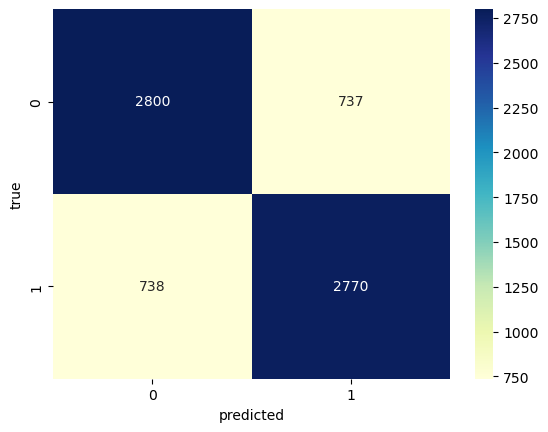

In [47]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


### roc score

[0.98129811 0.10939288 0.88916694 0.07271164 0.84896958 0.53135697
 0.92470206 0.45976839 0.59751016 0.82524498 0.25023648 0.95115795
 0.99368856 0.81584297 0.00450921 0.68541939 0.76188066 0.90422427
 0.52143068 0.07902058 0.27414777 0.38246641 0.76670179 0.69739189
 0.90620894 0.29163005 0.41649325 0.9718438  0.5579516  0.77560695
 0.17053184 0.4267859  0.80965141 0.46763466 0.11434546 0.09571232
 0.78849359 0.76530728 0.60597208 0.92624233 0.70234373 0.98334572
 0.41907356 0.20849831 0.06220651 0.67240149 0.04495948 0.93972455
 0.87373937 0.9780889  0.10367779 0.22945154 0.44952928 0.18634099
 0.05002997 0.85267694 0.05034563 0.11868478 0.84391295 0.08140887
 0.93676704 0.97096436 0.47546673 0.42638127 0.9309709  0.56420977
 0.16480666 0.57126795 0.74589148 0.45310513 0.36429314 0.62917961
 0.42895096 0.376567   0.86311513 0.44343641 0.9722772  0.38381083
 0.48863153 0.10493237 0.48498041 0.82063997 0.5985615  0.41515252
 0.70358272 0.57149657 0.18357387 0.78740911 0.03522499 0.3553

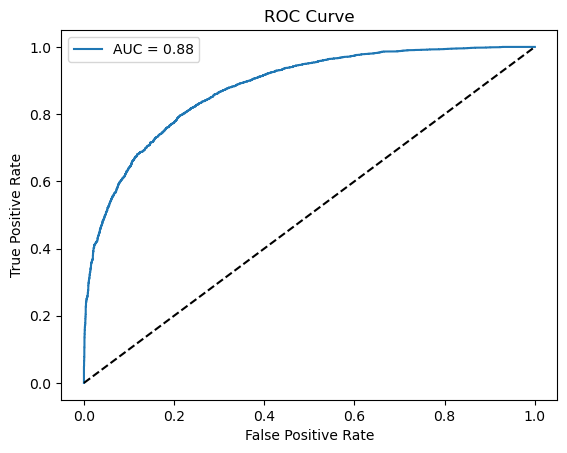

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Important features

In [50]:
features = pd.DataFrame(rf2.feature_importances_, index = X_train.columns)

In [51]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_infront_ball,0.068701
avg_positioning_percent_behind_ball,0.068630
avg_positioning_time_front_of_ball,0.044228
max_positioning_percent_behind_ball,0.039687
min_positioning_percent_infront_ball,0.028249
...,...
movement_avg_speed_percentage_3,0.002232
min_speed,0.002138
movement_avg_powerslide_duration_1,0.001220
movement_avg_powerslide_duration_2,0.001195
